# I - Code d'origine

 source du code d'origine : https://www.kaggle.com/code/setyoab/heart-attack-analysis-using-logisticregression

In [1]:
# On importe les librairies

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use("fivethirtyeight")
sns.set_style("whitegrid")

c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# On importe le dataset 

df = pd.read_csv("heart.csv")
print(f"data shape : {df.shape}")

data shape : (303, 14)


In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot: >

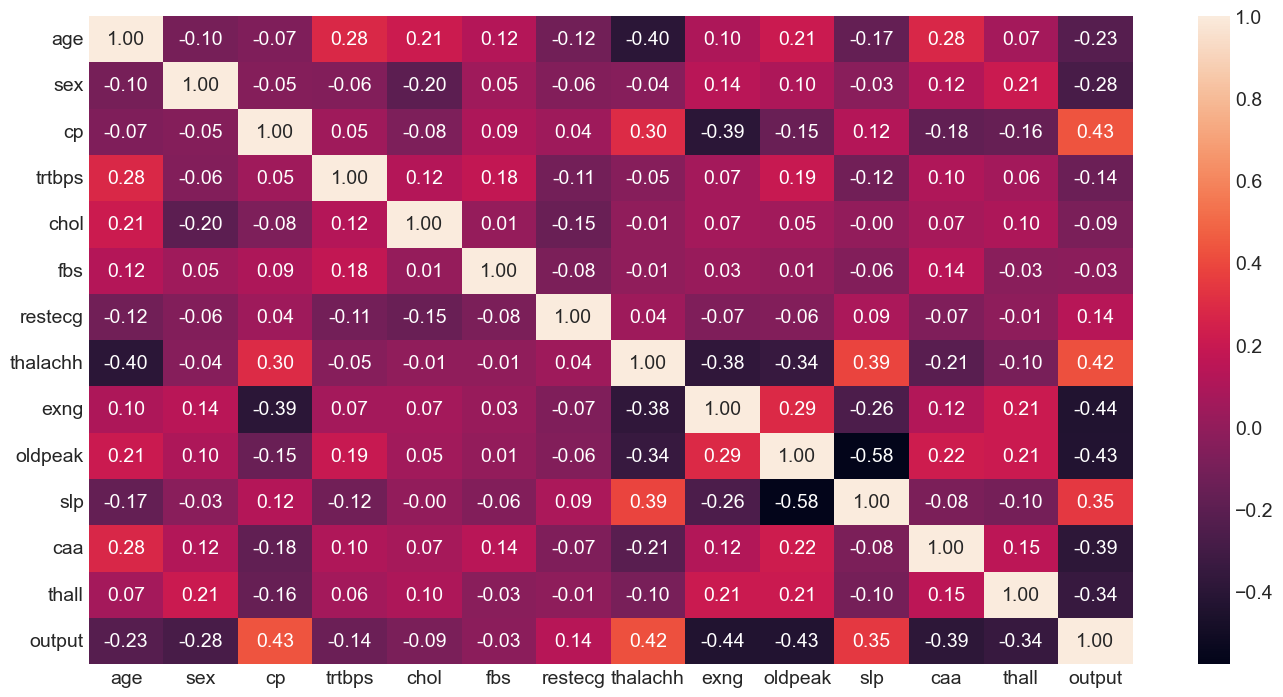

In [5]:
# heatmap de corrélation

plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, fmt = ".2f")


## EDA

Text(0.5, 1.0, 'rest ecg based on output')

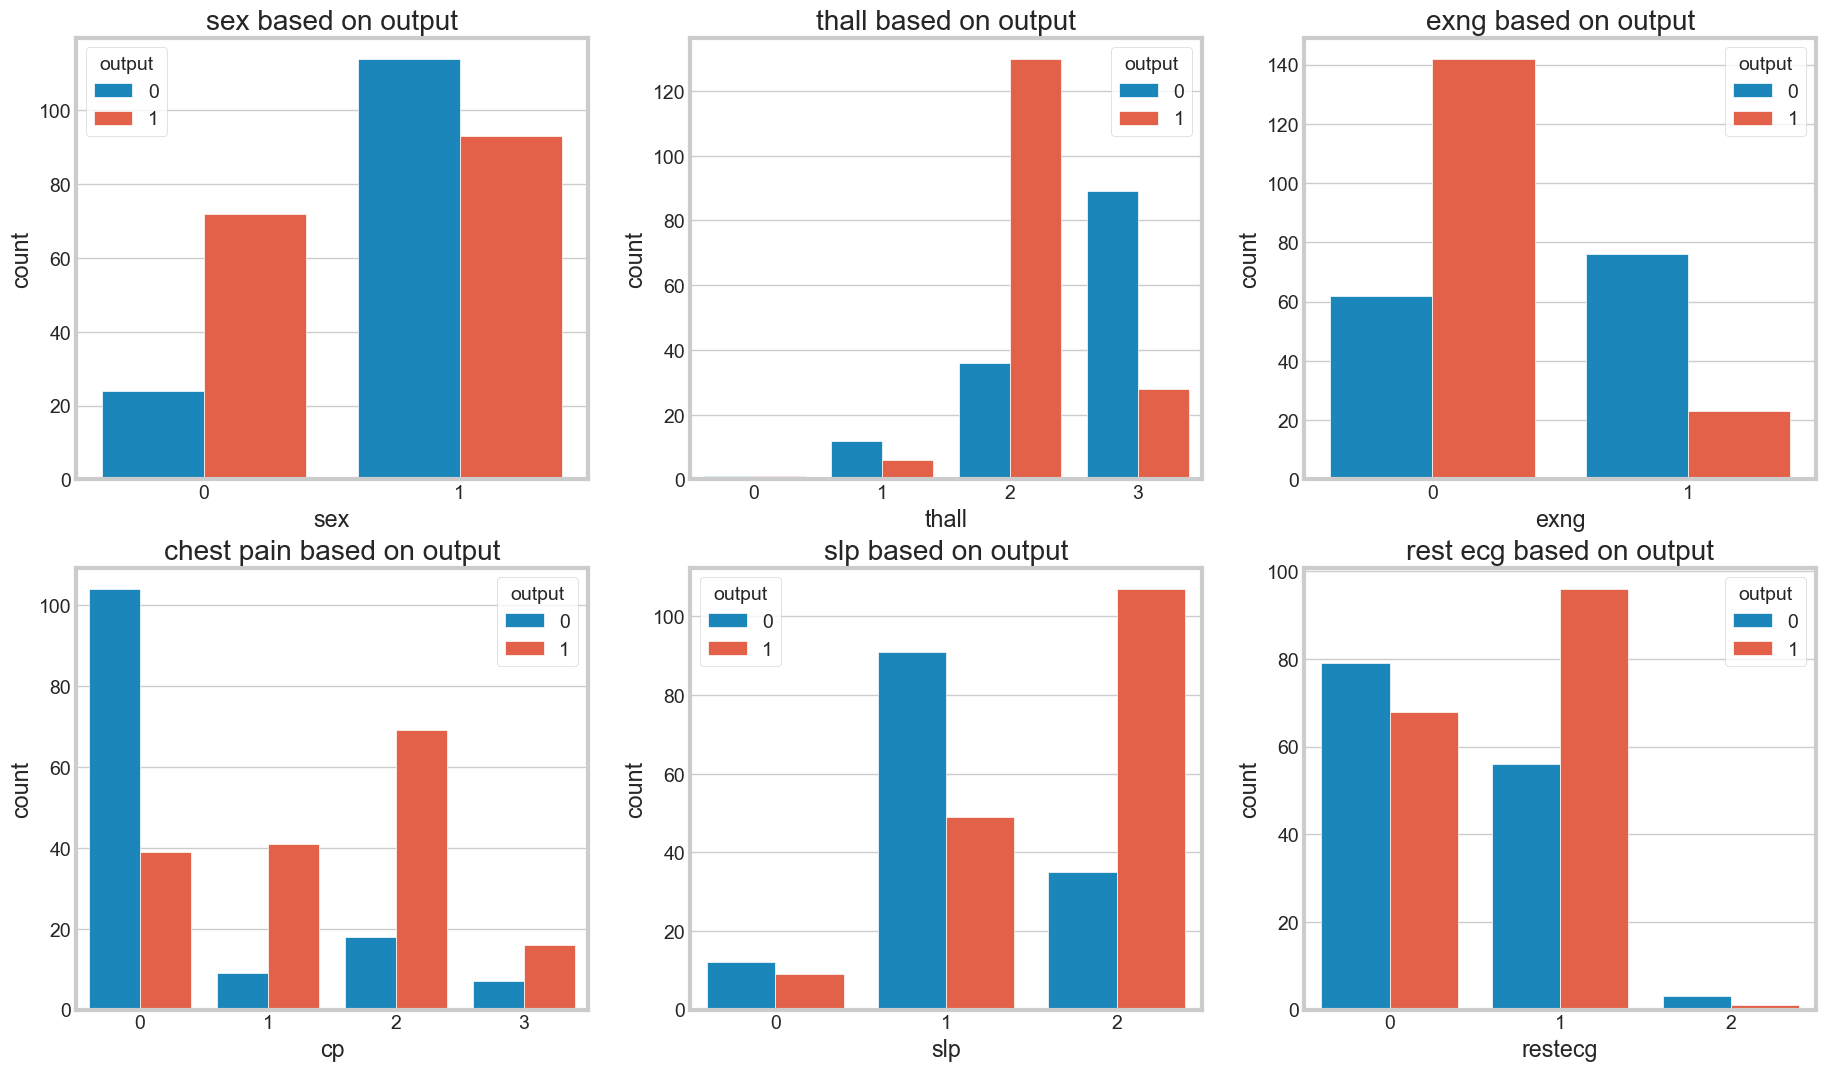

In [6]:
fig,axes = plt.subplots(2,3,figsize=(20,12))
col = ['sex', 'thall', 'exng']
sns.countplot(ax = axes[0, 0], data = df, x = 'sex', hue ='output')
sns.countplot(ax = axes[0, 1],data = df, x = 'thall', hue = 'output')
sns.countplot(ax = axes[0, 2],data = df, x = 'exng', hue = 'output')
sns.countplot(ax = axes[1, 0],data = df, x = 'cp', hue = 'output')
sns.countplot(ax = axes[1, 1],data = df, x = 'slp', hue = 'output')
sns.countplot(ax = axes[1, 2],data = df, x = 'restecg', hue = 'output')


# adding title to each subplots
axes[0,0].set_title('sex based on output')
axes[0,1].set_title('thall based on output')
axes[0,2].set_title('exng based on output')
axes[1,0].set_title('chest pain based on output')
axes[1,1].set_title('slp based on output')
axes[1,2].set_title('rest ecg based on output')


Text(0.5, 1.0, 'Age countplot')

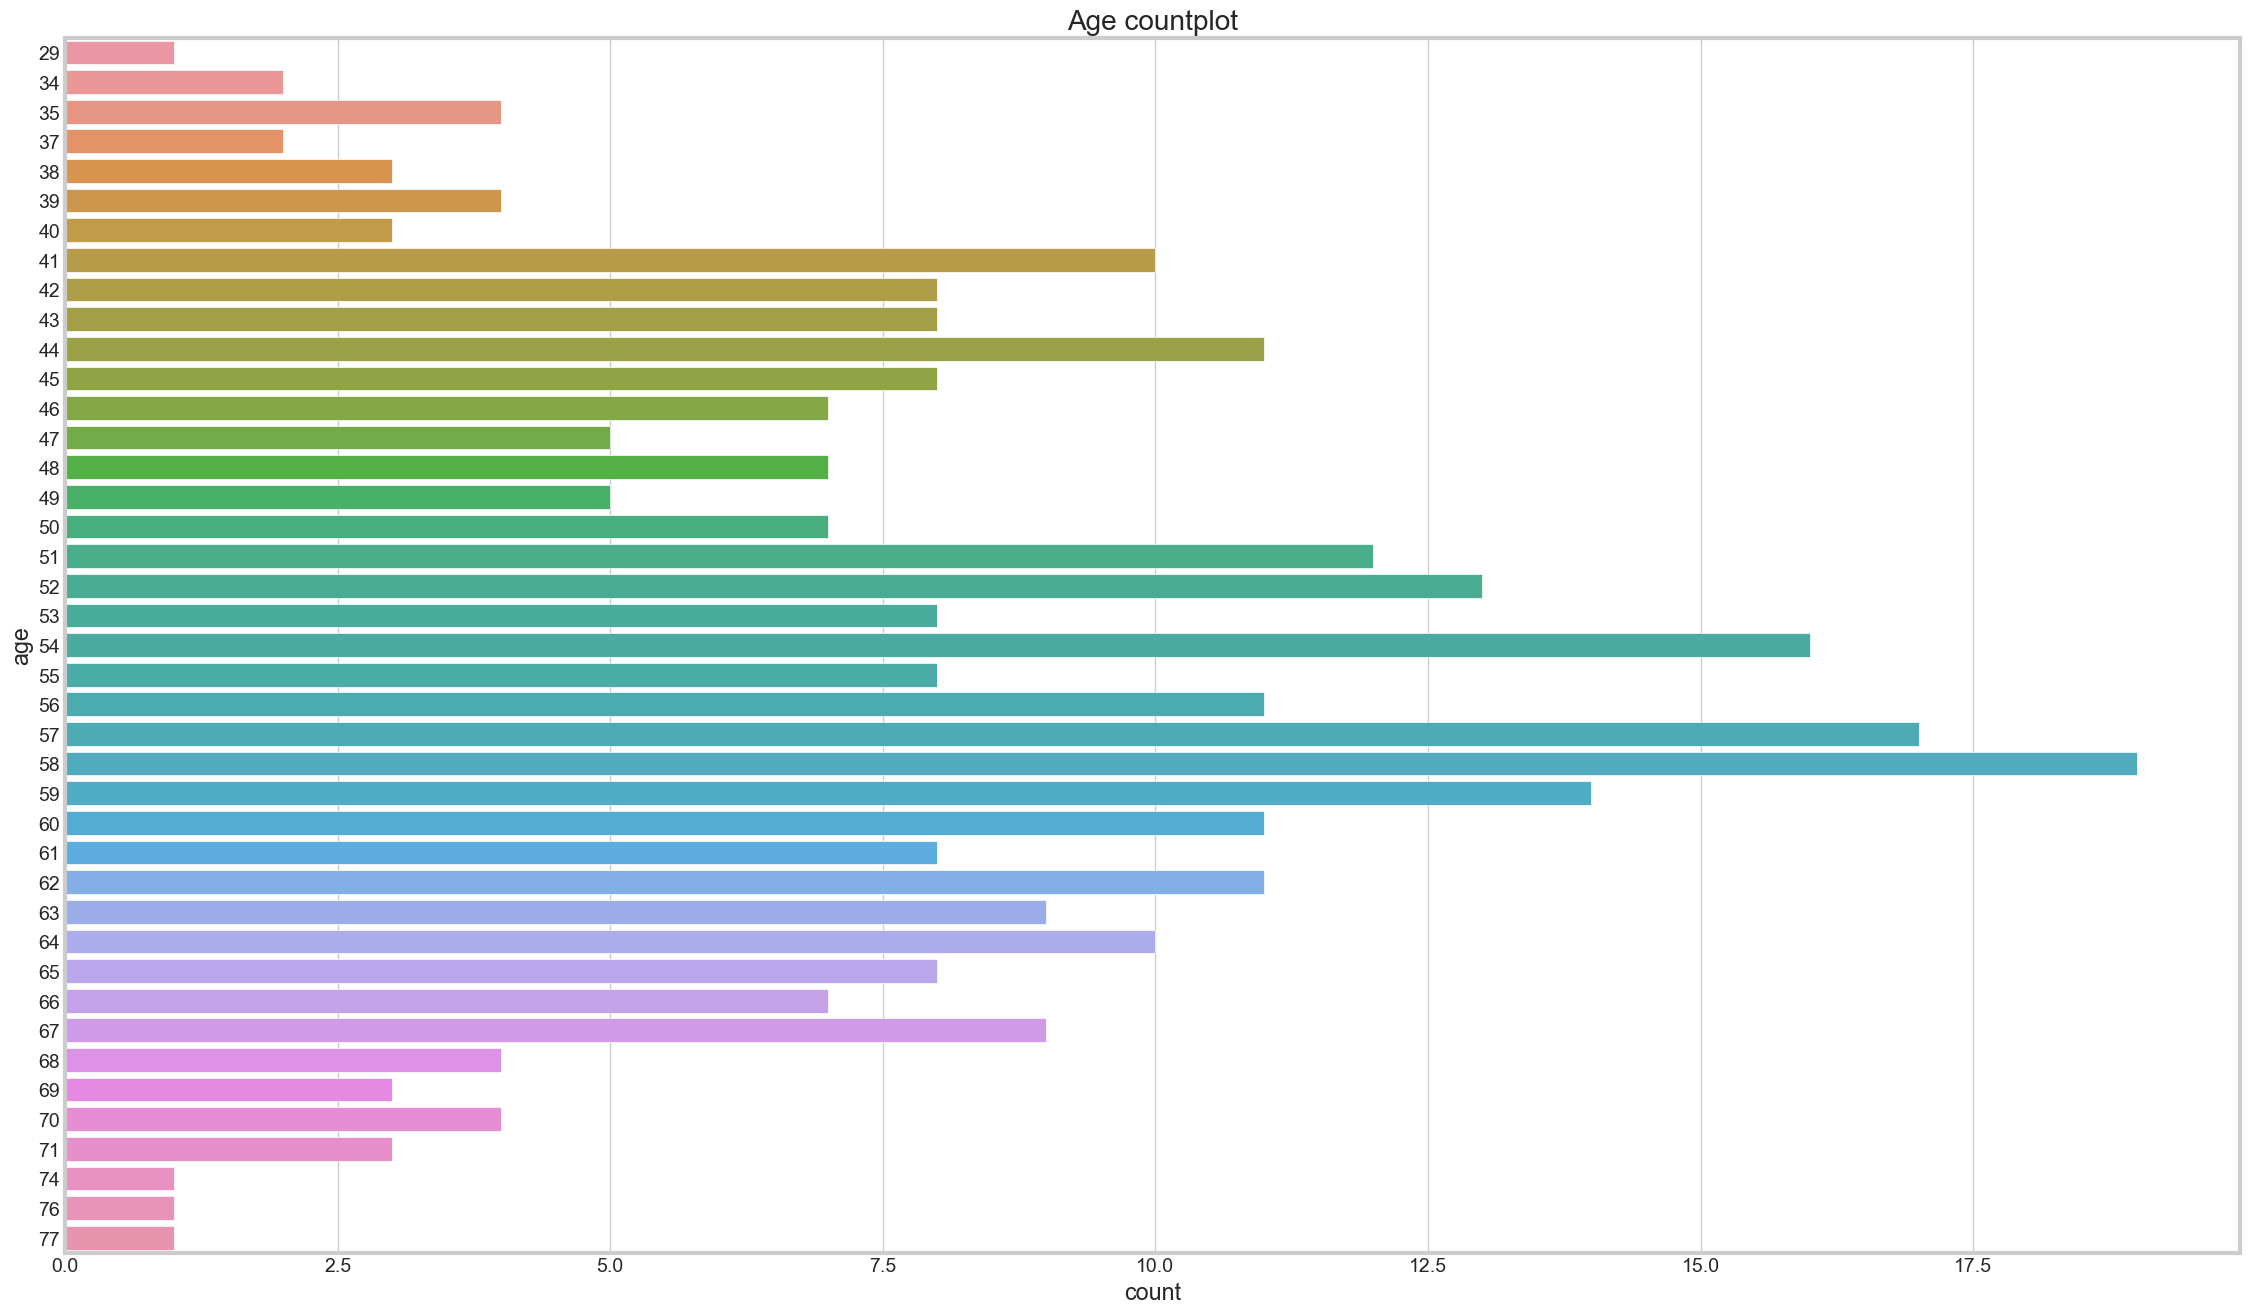

In [7]:
plt.figure(figsize=(25,15))
sns.countplot(data = df, y = df['age'])
plt.title('Age countplot')

<Figure size 1000x800 with 0 Axes>

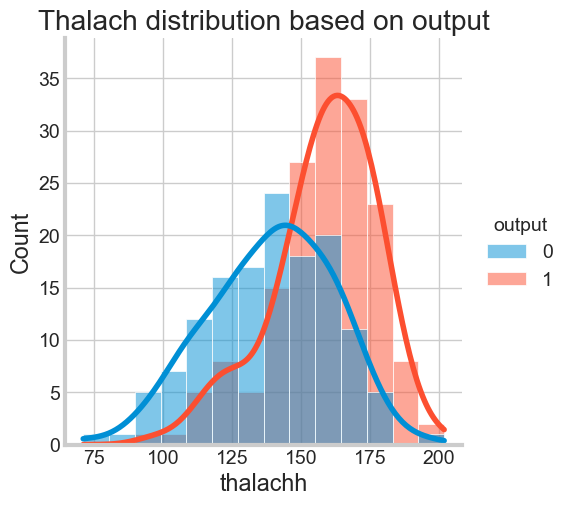

In [8]:
plt.figure(figsize=(10,8))
sns.displot(data = df, x = 'thalachh', kde = True, hue = 'output')
plt.title('Thalach distribution based on output')
plt.show()

Text(0.5, 1.0, 'cholesterol based on output')

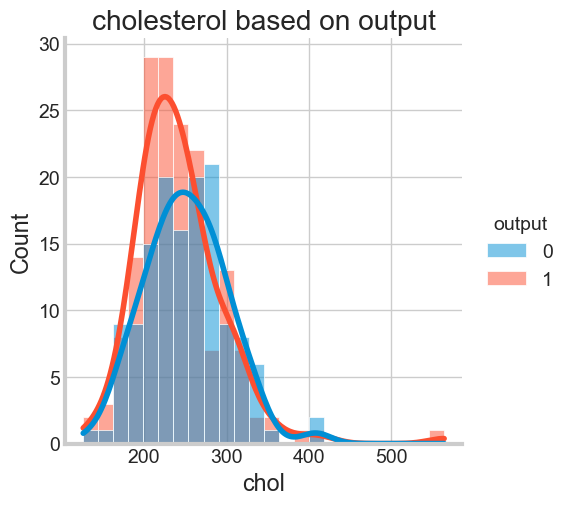

In [9]:
sns.displot(data = df, x = 'chol', kde = True, hue = 'output')
plt.title('cholesterol based on output')

## Création du Modèle

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [11]:
X = df.drop("output",  axis = 1)
y = df["output"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
log_model = LogisticRegression(solver = "lbfgs",
                               max_iter = 1000)

log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
pred = log_model.predict(X_test)

In [15]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [16]:
print(f"accuracy on test set : {log_model.score(X_test, y_test)}")

accuracy on test set : 0.8131868131868132


# II - Phase d'optimisation

## Analyse de la colonne target
On va analyser la répartition des deux valeures target, afin ,de voir si notre dataset est équilibré ou non

In [3]:
# On vérifie la distribution de notre target

df["output"].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

On voit que notre dataset est plutot équilibré, nous n'avons donc pas besoin de faire un travail de traitement des données dans ce sens

In [4]:
# Recherche de corrélations par rapport à notre target

cor_matrix = df.corr()
cor_matrix["output"].sort_values(ascending = False)

output      1.000000
cp          0.433798
thalachh    0.421741
slp         0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trtbps     -0.144931
age        -0.225439
sex        -0.280937
thall      -0.344029
caa        -0.391724
oldpeak    -0.430696
exng       -0.436757
Name: output, dtype: float64

On voit que 3 variables ont une corrélation positive sur notre target :
 - cp : 0.434 
 - thalachh : 0.422 
 - slp : 0.346

3 variables ont aussi une corrélation négative sur notre target : 
- exng : -0.437
- oldpeak : -0.431
- caa : -0.392

Nous n'avons aucune corralation linéaire vis à vis de notre target.

## Preprocessing

In [51]:
# Création d'un pipeline

from sklearn.pipeline import make_pipeline

# Utilisation de RobusScaller 
from sklearn.preprocessing import RobustScaler

# Import de nos modèles de machine learning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, classification_report

from sklearn.model_selection import learning_curve

import numpy as np

from sklearn.model_selection import GridSearchCV

In [23]:
# Création de notre dataset d'entrainement et de validation

X = df.drop("output",  axis = 1)
y = df["output"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [29]:
# Creation de nos différents modèles

model_log_Reg = make_pipeline(RobustScaler(), 
                      LogisticRegression())

model_dec_tree_class = make_pipeline(RobustScaler(), 
                      DecisionTreeClassifier())

model_SVC = make_pipeline(RobustScaler(), 
                      SVC(probability = True))



### Test des modèles sans optimisation des hyper paramètres

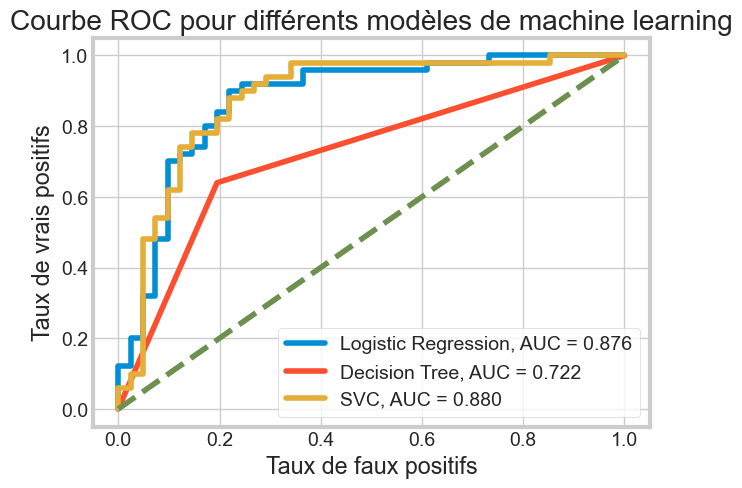

In [30]:
# Création courbes ROC
# Initialiser les modèles
models = [model_log_Reg, model_dec_tree_class, model_SVC]
model_names = ['Logistic Regression', 'Decision Tree', 'SVC']

# Boucle sur les modèles pour les entraîner et prédire les probabilités
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculer la courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, label=name + ', AUC = %0.3f' % auc)
    
# Ajouter des annotations et légendes
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour différents modèles de machine learning')
plt.legend()

# Afficher la figure
plt.show()

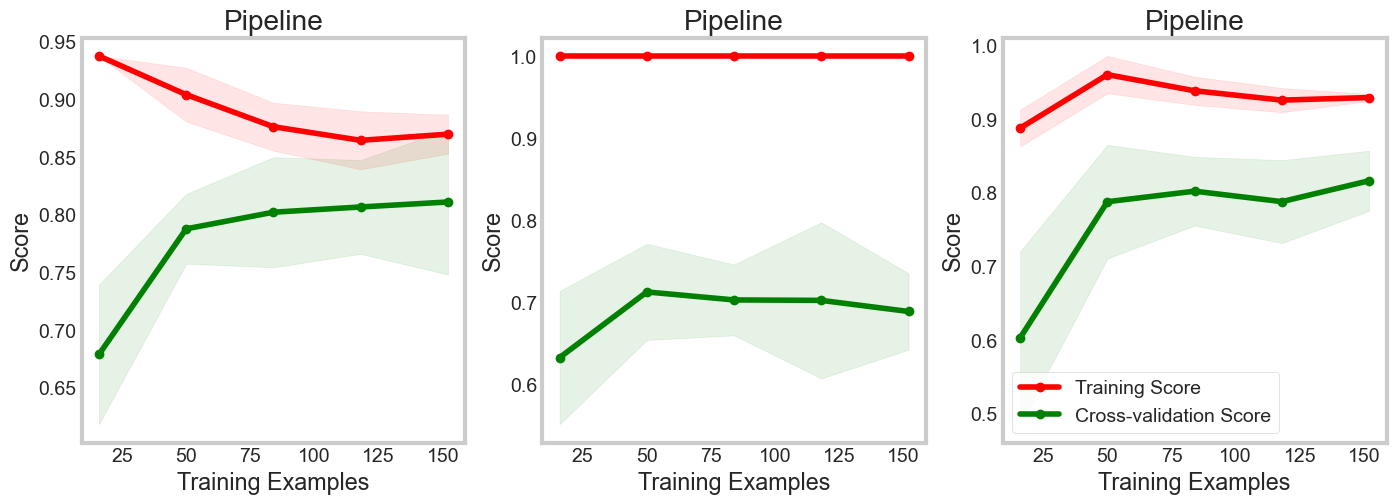

In [34]:
# Courbe d'apprentissage

fig, axes = plt.subplots(1, len(models), figsize=(15, 5))
for i, model in enumerate(models):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)
    axes[i].set_title(type(model).__name__)
    axes[i].set_xlabel("Training Examples")
    axes[i].set_ylabel("Score")
    axes[i].grid()
    axes[i].fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes[i].fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")
    axes[i].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    axes[i].plot(train_sizes, val_scores_mean, 'o-', color="g", label="validation Score")
plt.legend(loc="best")

### Optimisation de nos modèles avec GridSearchCv

In [53]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    
    print(f"Matrix de confusion {confusion_matrix(y_test,ypred)}")
    print(f"Report Classification {classification_report(y_test,ypred)}")
    
    N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,train_sizes=np.linspace(0.1,1,10),
                                            scoring="precision")
    
    plt.figure(figsize=(10,5))
    plt.plot(N,train_score.mean(axis=1),label="Train score")
    plt.plot(N,val_score.mean(axis=1),label="Validation score")
    plt.legend()

In [45]:
# Création de nos paramètres

param_grid_SVC = {'svc__C': (1e-3,0.1,1, 10), 
                  'svc__kernel': ['linear', 'rbf'], 
                  'svc__gamma': (1e-3,0.1,1, 10)}

param_grid_log_reg = {"logisticregression__penalty": ["l1", "l2", "elasticnet"],
                      "logisticregression__C": (0.1, 1, 10, 100),
                      "logisticregression__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                      "logisticregression__max_iter": range(1, 1000,10)
                      }

param_grid_dec_tree = {"decisiontreeclassifier__max_depth": range(1, 1000, 10),
                       "decisiontreeclassifier__min_samples_split": range(1, 100, 10),
                       "decisiontreeclassifier__min_samples_leaf": range(1, 100, 10),
                       "decisiontreeclassifier__max_features": range(1, 100, 10),
                       "decisiontreeclassifier__criterion": ["gini", "entropy"]


}


In [70]:

def optimisation(model, param_grid):

    grid = GridSearchCV(model, param_grid= param_grid, cv = 5, scoring = "precision", n_jobs = -1, verbose = 2)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.best_estimator_)
    return (grid.best_estimator_)

### Logistic Regression

In [61]:
best_model_log_reg = optimisation(model_log_Reg, param_grid_log_reg)


Fitting 5 folds for each of 6000 candidates, totalling 30000 fits
{'logisticregression__C': 0.1, 'logisticregression__max_iter': 1, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'lbfgs'}
0.8931829573934836
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('logisticregression', LogisticRegression(C=0.1, max_iter=1))])


c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
16000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py", line 116

c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Matrix de confusion [[35  6]
 [15 35]]
Report Classification               precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.85      0.70      0.77        50

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

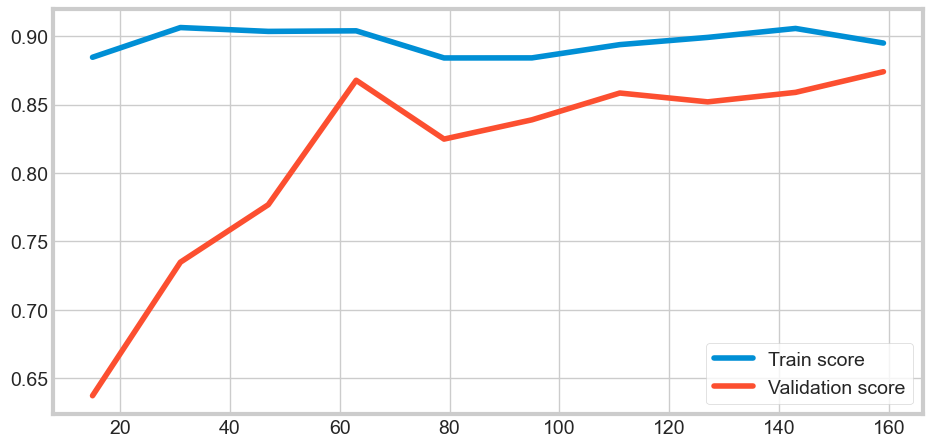

In [63]:
evaluation(best_model_log_reg)

### Decision Tree

In [71]:
best_model_decision_tree = optimisation(model_dec_tree_class, param_grid_dec_tree)

Fitting 5 folds for each of 200000 candidates, totalling 1000000 fits
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 251, 'decisiontreeclassifier__max_features': 11, 'decisiontreeclassifier__min_samples_leaf': 21, 'decisiontreeclassifier__min_samples_split': 71}
0.9158042164234115
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=251,
                                        max_features=11, min_samples_leaf=21,
                                        min_samples_split=71))])


c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Matrix de confusion [[35  6]
 [15 35]]
Report Classification               precision    recall  f1-score   support

           0       0.70      0.85      0.77        41
           1       0.85      0.70      0.77        50

    accuracy                           0.77        91
   macro avg       0.78      0.78      0.77        91
weighted avg       0.78      0.77      0.77        91



c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

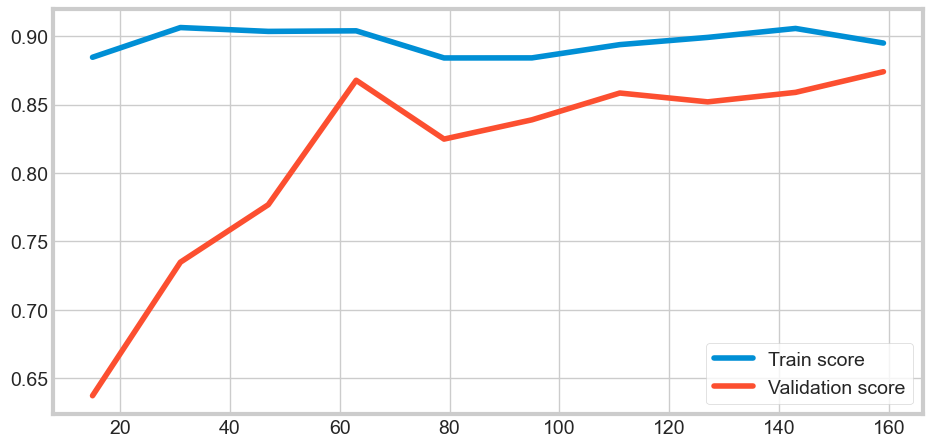

In [ ]:
evaluation(best_model_decision_tree)

### SVC

In [72]:
best_model_SVC = optimisation(model_SVC, param_grid_SVC)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
{'svc__C': 1, 'svc__gamma': 0.001, 'svc__kernel': 'linear'}
0.8230591182141722
Pipeline(steps=[('robustscaler', RobustScaler()),
                ('svc',
                 SVC(C=1, gamma=0.001, kernel='linear', probability=True))])


Matrix de confusion [[33  8]
 [ 8 42]]
Report Classification               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



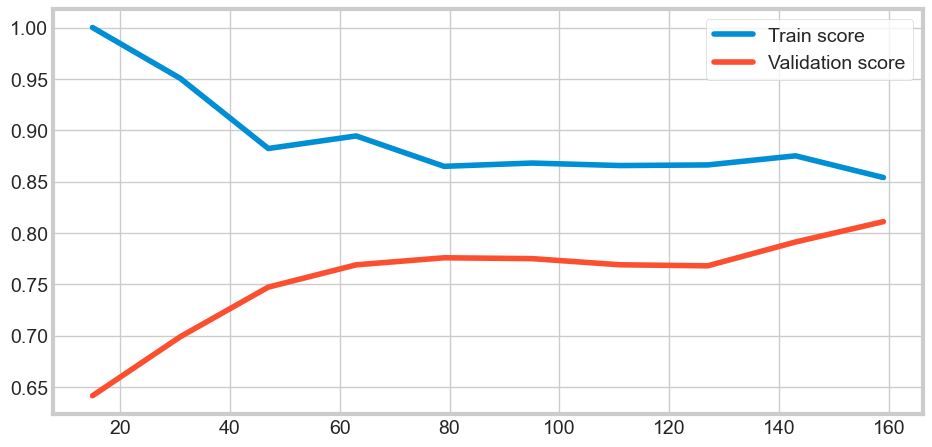

In [74]:
evaluation(best_model_SVC)

### Courbes ROC de l'ensemble de nos modèles

c:\Users\Utilisateur\anaconda3\envs\IA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


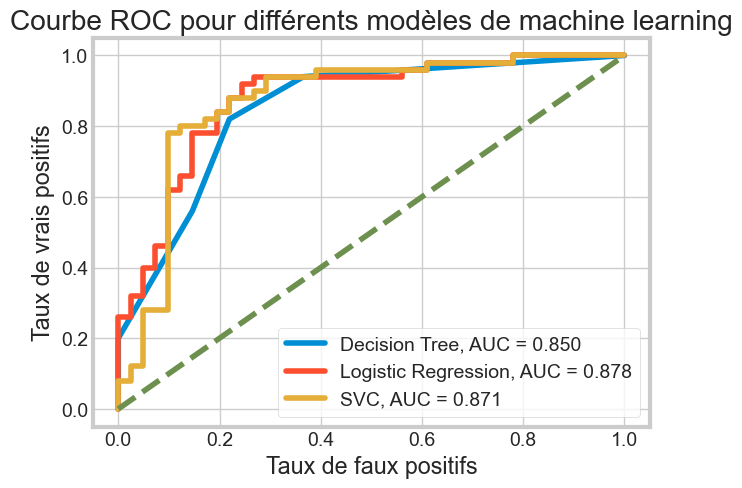

In [75]:
# Création courbes ROC
# Initialiser les modèles
models = [best_model_decision_tree, best_model_log_reg, best_model_SVC]
model_names = ['Decision Tree', 'Logistic Regression', 'SVC']

# Boucle sur les modèles pour les entraîner et prédire les probabilités
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculer la courbe ROC et AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Afficher la courbe ROC
    plt.plot(fpr, tpr, label=name + ', AUC = %0.3f' % auc)
    
# Ajouter des annotations et légendes
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC pour différents modèles de machine learning')
plt.legend()

# Afficher la figure
plt.show()